In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder
import folium
from folium.plugins import MarkerCluster

**1. Load the Dataset**

In [ ]:
og_data = pd.read_csv('/content/drive/MyDrive/DM_project/airbnb.csv').drop_duplicates()
data = og_data.copy()

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


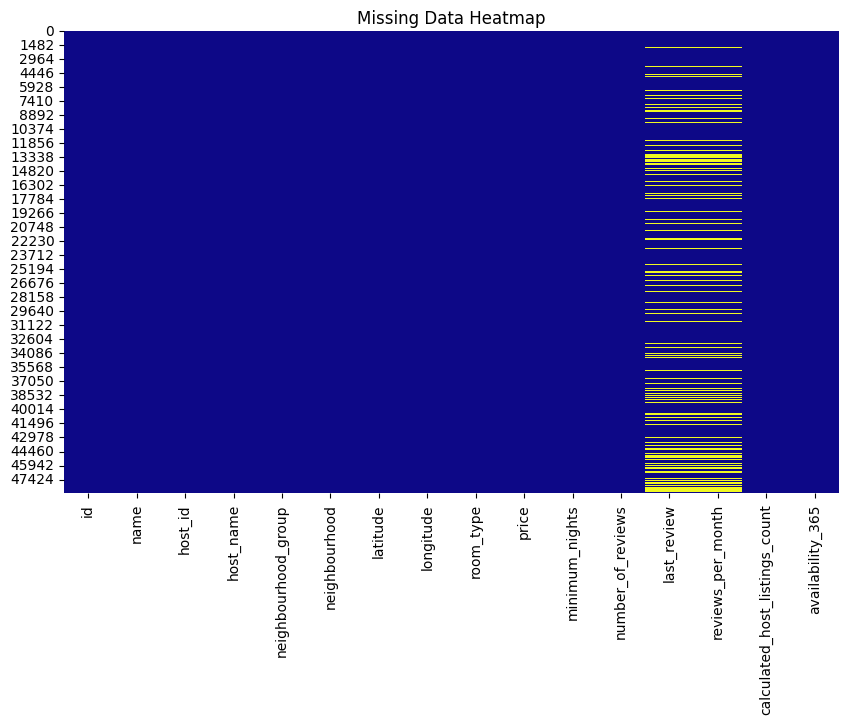

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# missing data
missingdata = data.isnull().mean().sort_values(ascending = False) # Finding Missing values and Plotting
plt.figure(figsize = (10, 6))
sns.heatmap(data.isnull(), cbar = False, cmap = 'plasma')
plt.title('Missing Data Heatmap')
plt.show()
print(data.isnull().sum())

In [ ]:
len(og_data['neighbourhood'].unique())

221

In [ ]:
og_data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
condition = data['reviews_per_month'].isnull() & data['last_review'].notnull()

print("Rows where reviews_per_month is missing but last_review is present:", condition.sum())

data['reviews_per_month'].fillna(0, inplace=True)

Rows where reviews_per_month is missing but last_review is present: 0


<ipython-input-8-f99213392ced>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews_per_month'].fillna(0, inplace=True)


In [ ]:
if 'reviews_per_month' in data.columns:
    data['reviews_per_month'] = data['reviews_per_month'].fillna(0)
columns_to_drop = ['id', 'name', 'host_id', 'host_name', 'last_review', 'neighbourhood']
data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)

In [ ]:
columns_to_encode = [col for col in ['room_type', 'neighbourhood_group'] if col in data.columns]
if columns_to_encode:
    data = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)

In [ ]:
for col in data.columns:
    if set(data[col].unique()).issubset({0, 1}):
        data[col] = data[col].astype(int)

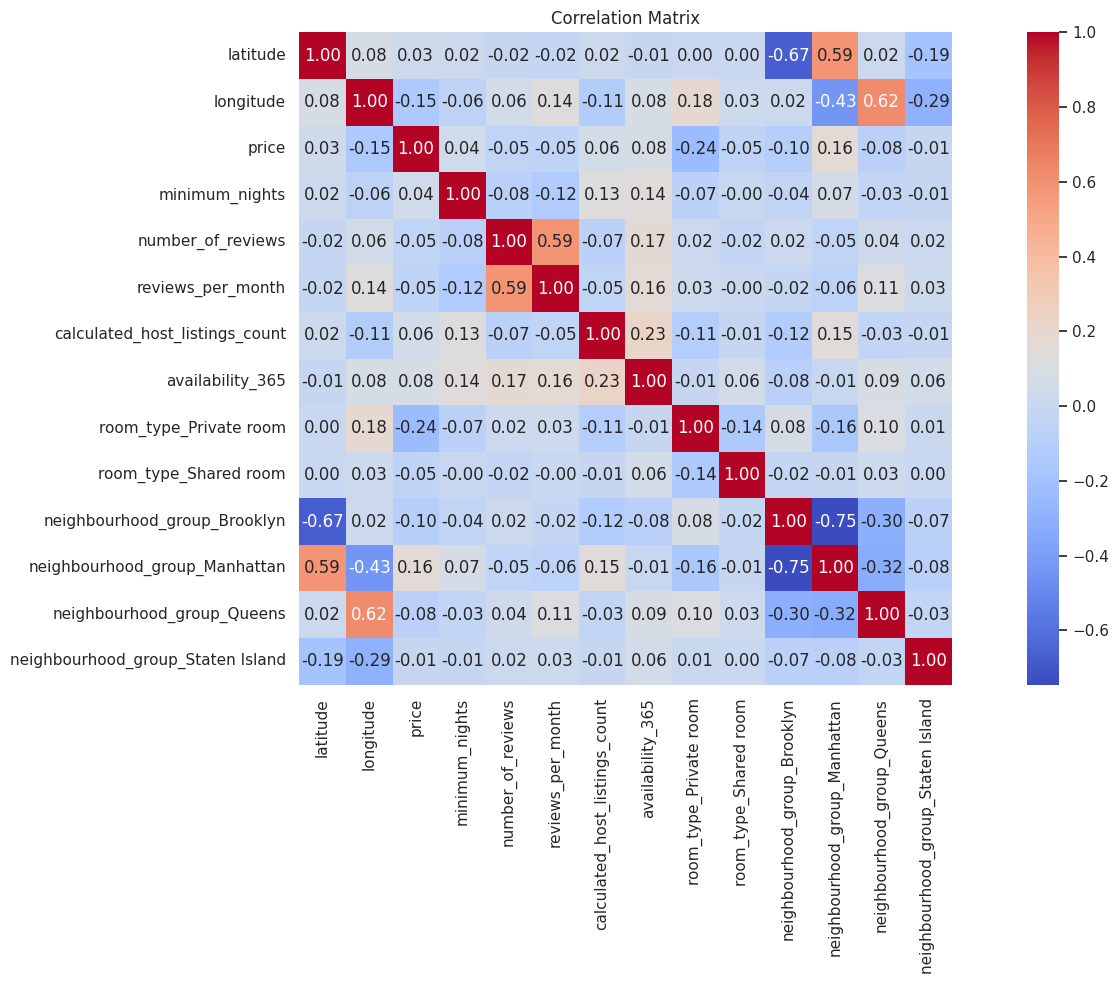

In [ ]:
correlation_matrix = data.corr(numeric_only = True)
sns.set(style = "whitegrid")
plt.figure(figsize = (16, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", square = True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
num_features = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
                'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
scaler = MinMaxScaler(feature_range=(1, 10))
data[num_features] = scaler.fit_transform(data[num_features])


In [ ]:
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,4.216541,5.607286,1.1341,1.000000,1.128776,1.032308,1.138037,10.000000,1,0,1,0,0,0
1,6.527791,5.414222,1.2025,1.000000,1.643879,1.058462,1.027607,9.753425,0,0,0,1,0,0
2,7.734266,6.123309,1.1350,1.014412,1.000000,1.000000,1.000000,10.000000,1,0,0,1,0,0
3,5.036465,5.820842,1.0801,1.000000,4.863275,1.713846,1.000000,5.783562,0,0,1,0,0,0
4,7.505384,6.087914,1.0720,1.064852,1.128776,1.015385,1.000000,1.000000,0,0,0,1,0,0


In [ ]:
# Apply PCA
pca = PCA(n_components=0.98)
data_pca = pd.DataFrame(pca.fit_transform(data))
data_pca.head()

,0,1,2,3,4,5,6
0,6.177478,-1.951076,0.011425,-0.480671,-0.534430,0.593552,-0.001553
1,5.943725,0.719393,0.069793,-1.016753,0.011650,-0.365115,-0.096066
2,6.172397,1.831414,-0.529438,-0.374153,-0.676633,0.558807,0.053424
3,2.106900,-1.243100,-0.590142,-0.542090,3.386318,-0.333822,0.447334
4,-2.790687,1.667486,-0.044066,-0.010911,-0.107640,-0.438255,0.104471


In [ ]:
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,4.216541,5.607286,1.1341,1.000000,1.128776,1.032308,1.138037,10.000000,1,0,1,0,0,0
1,6.527791,5.414222,1.2025,1.000000,1.643879,1.058462,1.027607,9.753425,0,0,0,1,0,0
2,7.734266,6.123309,1.1350,1.014412,1.000000,1.000000,1.000000,10.000000,1,0,0,1,0,0
3,5.036465,5.820842,1.0801,1.000000,4.863275,1.713846,1.000000,5.783562,0,0,1,0,0,0
4,7.505384,6.087914,1.0720,1.064852,1.128776,1.015385,1.000000,1.000000,0,0,0,1,0,0


In [ ]:
#Functions for K-means and evaluation
def random_centroids(data, k):
    return pd.concat([data.apply(lambda x: float(x.sample().iloc[0])) for _ in range(k)], axis=1)

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

def new_centroids(data, labels, k):
    return data.groupby(labels).mean().T

def compute_mse(data, labels, centroids):
    total_error = 0
    for i in range(len(centroids.columns)):
        cluster_points = data[labels == i]
        if not cluster_points.empty:
            errors = ((cluster_points - centroids.iloc[:, i].values) ** 2).sum(axis=1)
            total_error += errors.sum()
    return total_error / len(data)

def assign_clusters(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

def compute_clustering_metrics(data, labels, centroids):
    mse = compute_mse(data, labels, centroids)
    total_variance = ((data - data.mean())**2).sum().sum() / len(data)
    percentage_error = (mse / total_variance) * 100
    clustering_accuracy = (1 - (mse / total_variance)) * 100
    return mse, percentage_error, clustering_accuracy

def plot_clusters(data, labels, centroids, title):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.scatter(data_2d[:,0], data_2d[:,1], c=labels, cmap='viridis')
    plt.scatter(centroids_2d[:,0], centroids_2d[:,1], marker='X', s=200, edgecolor='k')
    plt.title(title)
    plt.grid(True)
    plt.show()

def run_kmeans(data, k, max_iterations=100, plot_each_iter=False):
    centroids = random_centroids(data, k)
    old_centroids = pd.DataFrame()
    iteration = 1
    while iteration < max_iterations and not centroids.equals(old_centroids):
        old_centroids = centroids
        labels = get_labels(data, centroids)
        centroids = new_centroids(data, labels, k)
        if plot_each_iter:
            plot_clusters(data, labels, centroids, title=f'K-means Iteration {iteration}')
        iteration += 1
    return labels, centroids

def bisecting_kmeans(data, final_k, max_iterations=100):
    clusters = {0: data.copy()}
    cluster_assignments = pd.Series(0, index=data.index)
    next_cluster_label = 1

    while len(clusters) < final_k:
        sse_values = {label: compute_mse(cluster, pd.Series(0, index=cluster.index),
                                         new_centroids(cluster, pd.Series(0, index=cluster.index), 1))
                      for label, cluster in clusters.items()}
        cluster_to_split = max(sse_values, key=sse_values.get)

        cluster_data = clusters.pop(cluster_to_split)
        labels, centroids = run_kmeans(cluster_data, 2, max_iterations)

        for new_label in [0, 1]:
            mask = labels == new_label
            clusters[next_cluster_label] = cluster_data[mask]
            cluster_assignments[cluster_data[mask].index] = next_cluster_label
            next_cluster_label += 1

        plot_clusters(data, cluster_assignments, new_centroids(data, cluster_assignments, len(clusters)),
                      title=f'Bisecting K-means - {len(clusters)} Clusters')

    return cluster_assignments

def plot_elbow_curve(data, max_k=10):
    errors = []
    k_values = range(1, max_k + 1)

    for k in k_values:
        labels, centroids = run_kmeans(data, k, max_iterations=50, plot_each_iter=False)
        mse = compute_mse(data, labels, centroids)
        errors.append(mse)

    plt.figure(figsize=(8, 5))
    plt.plot(k_values, errors, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

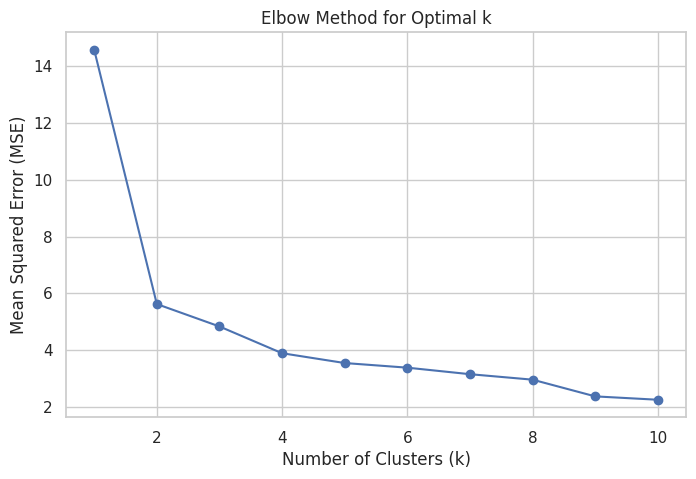

In [ ]:
#Elbow plot
plot_elbow_curve(data_pca, max_k=10)

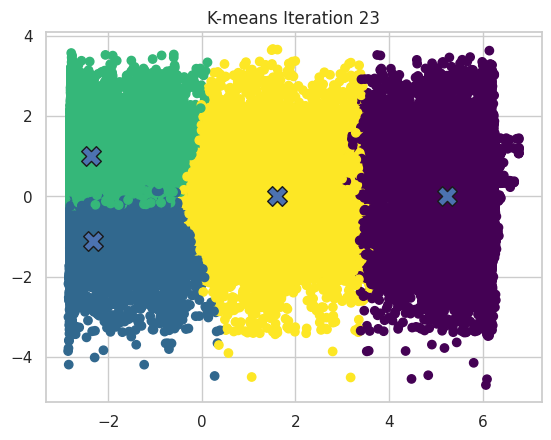

In [ ]:
# K-means clustering
labels_kmeans, centroids_kmeans = run_kmeans(data, k=4, max_iterations=100, plot_each_iter=True)

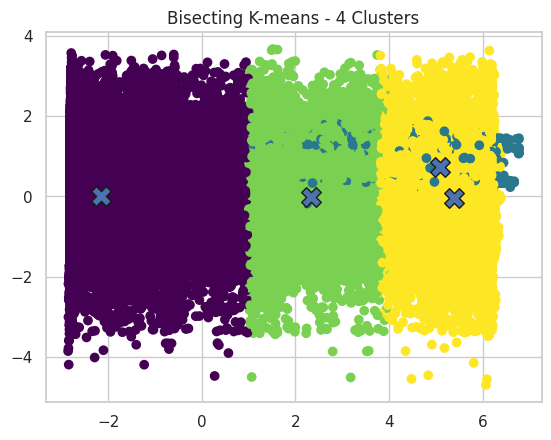

In [ ]:
# Bisecting K-means clustering
cluster_assignments_bisect = bisecting_kmeans(data, final_k=4, max_iterations=100)

In [ ]:
le = LabelEncoder()
cluster_assignments_bisect = pd.Series(le.fit_transform(cluster_assignments_bisect))

In [ ]:
og_data['cluster_kmeans'] = labels_kmeans + 1
og_data['cluster_bisect'] = cluster_assignments_bisect + 1

In [ ]:
og_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,cluster_kmeans,cluster_bisect
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1,4
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1,4
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1,4
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,3,1


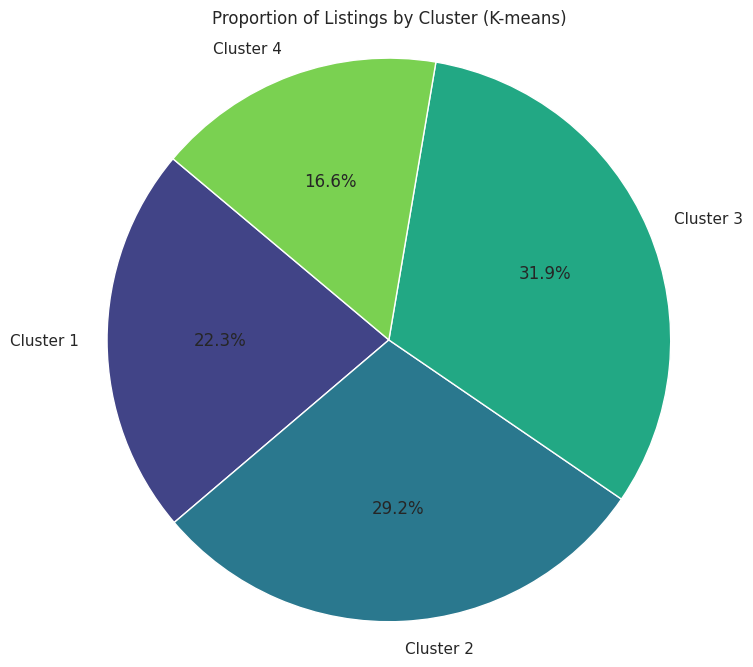

In [ ]:
#Pie Chart
cluster_counts = og_data['cluster_kmeans'].value_counts().sort_index()

plt.figure(figsize=(8,8))
plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in cluster_counts.index],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', n_colors=len(cluster_counts)))

plt.title('Proportion of Listings by Cluster (K-means)')
plt.axis('equal')
plt.show()


In [ ]:
#Calculate global averages
global_avg_price = og_data['price'].mean()
global_avg_availability = og_data['availability_365'].mean()
global_avg_reviews = og_data['number_of_reviews'].mean()
global_avg_host_listings = og_data['calculated_host_listings_count'].mean()
global_avg_min_nights = og_data['minimum_nights'].mean()

cluster_profiles = []

for cluster_id in sorted(og_data['cluster_kmeans'].unique()):
    cluster_data = og_data[og_data['cluster_kmeans'] == cluster_id]

    avg_price = cluster_data['price'].mean()
    avg_availability = cluster_data['availability_365'].mean()
    avg_reviews = cluster_data['number_of_reviews'].mean()
    avg_host_listings = cluster_data['calculated_host_listings_count'].mean()
    avg_min_nights = cluster_data['minimum_nights'].mean()

    price_diff = ((avg_price - global_avg_price) / global_avg_price) * 100
    availability_diff = ((avg_availability - global_avg_availability) / global_avg_availability) * 100
    reviews_diff = ((avg_reviews - global_avg_reviews) / global_avg_reviews) * 100
    host_diff = ((avg_host_listings - global_avg_host_listings) / global_avg_host_listings) * 100
    min_nights_diff = ((avg_min_nights - global_avg_min_nights) / global_avg_min_nights) * 100

    price_level = 'High' if price_diff > 0 else 'Low'
    availability_level = 'High' if availability_diff > 0 else 'Low'
    review_activity = 'High' if reviews_diff > 0 else 'Low'
    host_scale = 'Large' if host_diff > 0 else 'Small'
    stay_length = 'Long' if min_nights_diff > 0 else 'Short'

    if 'room_type' in cluster_data.columns:
        dominant_room_type = cluster_data['room_type'].mode()[0]
    else:
        dominant_room_type = 'Unknown'

    if 'neighbourhood_group' in cluster_data.columns:
        dominant_neigh = cluster_data['neighbourhood_group'].mode()[0]
    else:
        dominant_neigh = 'Unknown'

    cluster_profiles.append({
        'Cluster': int(cluster_id),
        'Price Level': f"{price_level} ({price_diff:+.1f}%)",
        'Availability': f"{availability_level} ({availability_diff:+.1f}%)",
        'Review Activity': f"{review_activity} ({reviews_diff:+.1f}%)",
        'Host Scale': f"{host_scale} ({host_diff:+.1f}%)",
        'Stay Length': f"{stay_length} ({min_nights_diff:+.1f}%)",
        'Dominant Room Type': dominant_room_type,
        'Dominant Neighborhood': dominant_neigh,
        'Avg Listings Count': f"{avg_host_listings:.2f}",
        'Avg Minimum Nights': f"{avg_min_nights:.2f}"
    })

cluster_profiles_df = pd.DataFrame(cluster_profiles)

from tabulate import tabulate
print(tabulate(cluster_profiles_df, headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════╤═══════════════╤════════════════╤═══════════════════╤═════════════════╤════════════════╤══════════════════════╤═════════════════════════╤══════════════════════╤══════════════════════╕
│    │   Cluster │ Price Level   │ Availability   │ Review Activity   │ Host Scale      │ Stay Length    │ Dominant Room Type   │ Dominant Neighborhood   │   Avg Listings Count │   Avg Minimum Nights │
╞════╪═══════════╪═══════════════╪════════════════╪═══════════════════╪═════════════════╪════════════════╪══════════════════════╪═════════════════════════╪══════════════════════╪══════════════════════╡
│  0 │         1 │ High (+20.2%) │ High (+188.0%) │ High (+27.2%)     │ Large (+204.5%) │ Long (+70.4%)  │ Entire home/apt      │ Manhattan               │                21.75 │                11.98 │
├────┼───────────┼───────────────┼────────────────┼───────────────────┼─────────────────┼────────────────┼──────────────────────┼─────────────────────────┼──────────────────────┼──────────────

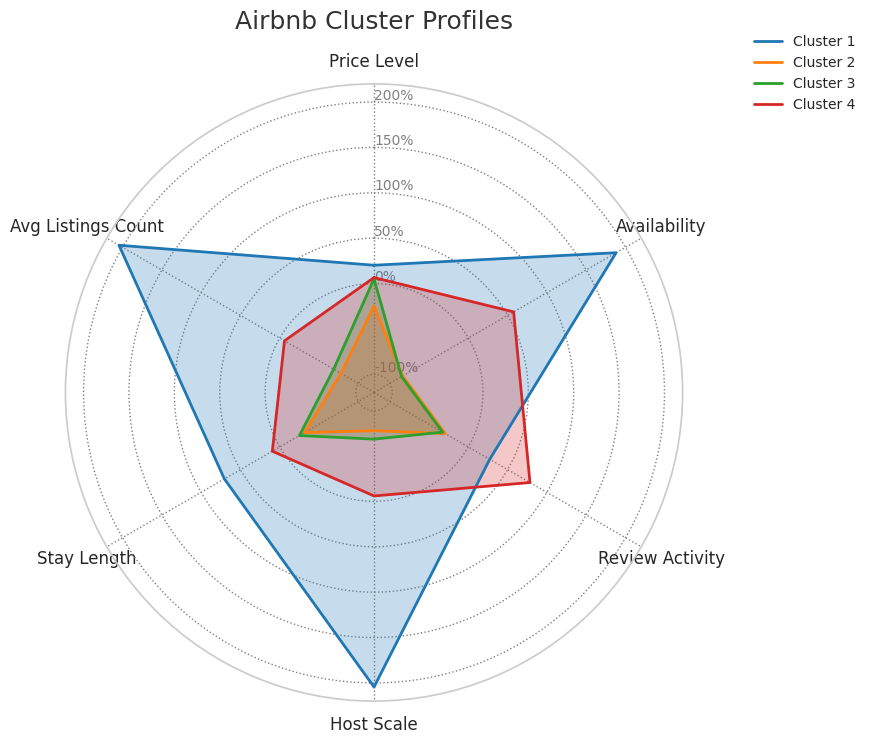

In [ ]:
#Radar chart
metrics = ['Price Level', 'Availability', 'Review Activity', 'Host Scale', 'Stay Length', 'Avg Listings Count']

def extract_percentage(x):
    if isinstance(x, str) and '(' in x:
        return float(x.split('(')[1].replace('%','').replace(')',''))
    else:
        return float(x)

radar_data = cluster_profiles_df[['Cluster'] + metrics].copy()

for metric in metrics:
    radar_data[metric] = radar_data[metric].apply(extract_percentage)

global_avg_listings = og_data['calculated_host_listings_count'].mean()
radar_data['Avg Listings Count'] = ((radar_data['Avg Listings Count'] - global_avg_listings) / global_avg_listings) * 100

labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, row in radar_data.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {int(row["Cluster"])}', linewidth=2, linestyle='solid', color=colors[i % len(colors)])
    ax.fill(angles, values, alpha=0.25, color=colors[i % len(colors)])

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=12)

ax.set_rlabel_position(0)
plt.yticks([-100, 0, 50, 100, 150, 200], ["-100%", "0%", "50%", "100%", "150%", "200%"], color="gray", size=10)
plt.ylim(-120, 220)

plt.title('Airbnb Cluster Profiles', size=18, color="#333333", pad=40)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10, frameon=False)
ax.grid(color='gray', linestyle='dotted')

plt.tight_layout()
plt.show()

In [ ]:
og_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,cluster_kmeans,cluster_bisect
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,3,4
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,3,4
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,3,4
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2,1


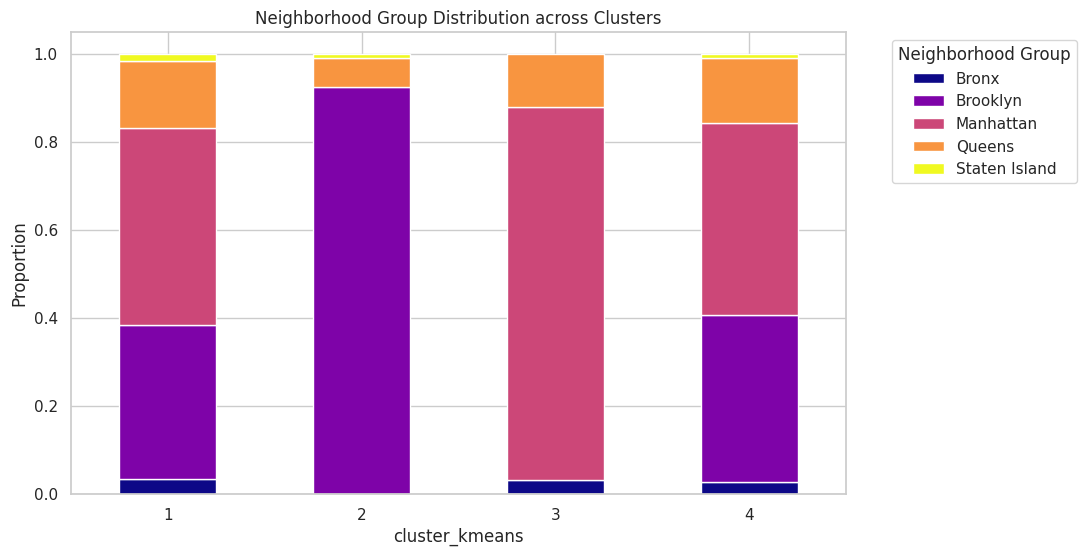

In [ ]:
#Stacked bar graph
neigh_counts = og_data.groupby('cluster_kmeans')['neighbourhood_group'].value_counts(normalize=True).unstack().fillna(0)

neigh_counts.plot(kind='bar', stacked=True, figsize=(10,6), colormap='plasma')
plt.title('Neighborhood Group Distribution across Clusters')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Neighborhood Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# Interactive map
map_center = [og_data['latitude'].mean(), og_data['longitude'].mean()]
nyc_map = folium.Map(location=map_center, zoom_start=11)
marker_cluster = MarkerCluster().add_to(nyc_map)
cluster_colors = ['red', 'green', 'blue', 'purple', 'orange']

for idx, row in og_data.iterrows():
    color = cluster_colors[int(row['cluster_kmeans']) - 1]
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster {row['cluster_kmeans']}",
        icon=folium.Icon(color=color, icon='home', prefix='fa')
    ).add_to(marker_cluster)

nyc_map

Folium map output was extracted to outputs/folium_map.html to keep the notebook small.


### Map output extracted
The interactive Folium map output was removed from the notebook to keep the `.ipynb` under GitHub limits **without re-running**.

- Open the saved map here: `outputs/folium_map.html`
- If you publish with GitHub Pages, link to the HTML file from the README.


In [ ]:
nyc_map.save('nyc_airbnb_map.html')